In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


I. Data Cleaning:
- Load Dataset
- Display first 5 rows and basic information about the dataset
- check descriptive statistics
- visualize distribution of legitimate vs phishing urls in the dataset.

In [209]:
phishing_url_dataset = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')

# 1.1 displaying basic information about the dataset and first 5 rows
phishing_url_dataset_info = phishing_url_dataset.info()
phishing_url_dataset_head = phishing_url_dataset.head()

# 1.2 Checking for duplicate rows
duplicate_rows = phishing_url_dataset.duplicated().sum()

phishing_url_dataset_info 
phishing_url_dataset_head
duplicate_rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

0

The dataset contains 235,795 rows and 56 columns with various features related to URL characteristics with the 'label' column indicating whether the URL is legitimate-0 or phishing-1. There are 5 object columns and remainig numerical. Initial analysis show no missing or duplicate values. 

In [211]:
# 1.3 Displaying descriptive statistics of each feature
descriptive_stats = phishing_url_dataset.describe()

descriptive_stats

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


C:\Users\samhi\AppData\Local\Temp\ipykernel_41908\407890296.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


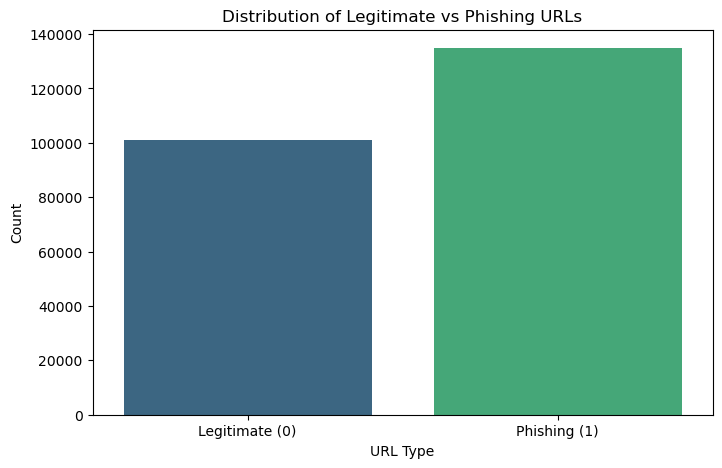

In [212]:
# 1.4.1 Checking distribution of legitimate vs phishing URLs
label_counts = phishing_url_dataset['label'].value_counts()

# 1.4.2 Plotting the distribution of legitimate vs phishing URLs
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Distribution of Legitimate vs Phishing URLs")
plt.xticks(ticks=[0, 1], labels=["Legitimate (0)", "Phishing (1)"])
plt.ylabel("Count")
plt.xlabel("URL Type")
plt.show()


The distribution shows that this is an unbalanced dataset with slight skewness. 


II Feature Analysis
- One of the objectives of this project is to explore different methods for feature analysis.
-  I want to compare models with important features from correlation analysis, forward elimination, and L1 regularization.
-  Note that all three of these methods explicitly use numerical features. 
-correlation analysis
-feature analysis using forward elimination
-feature analysis using L1 regularization

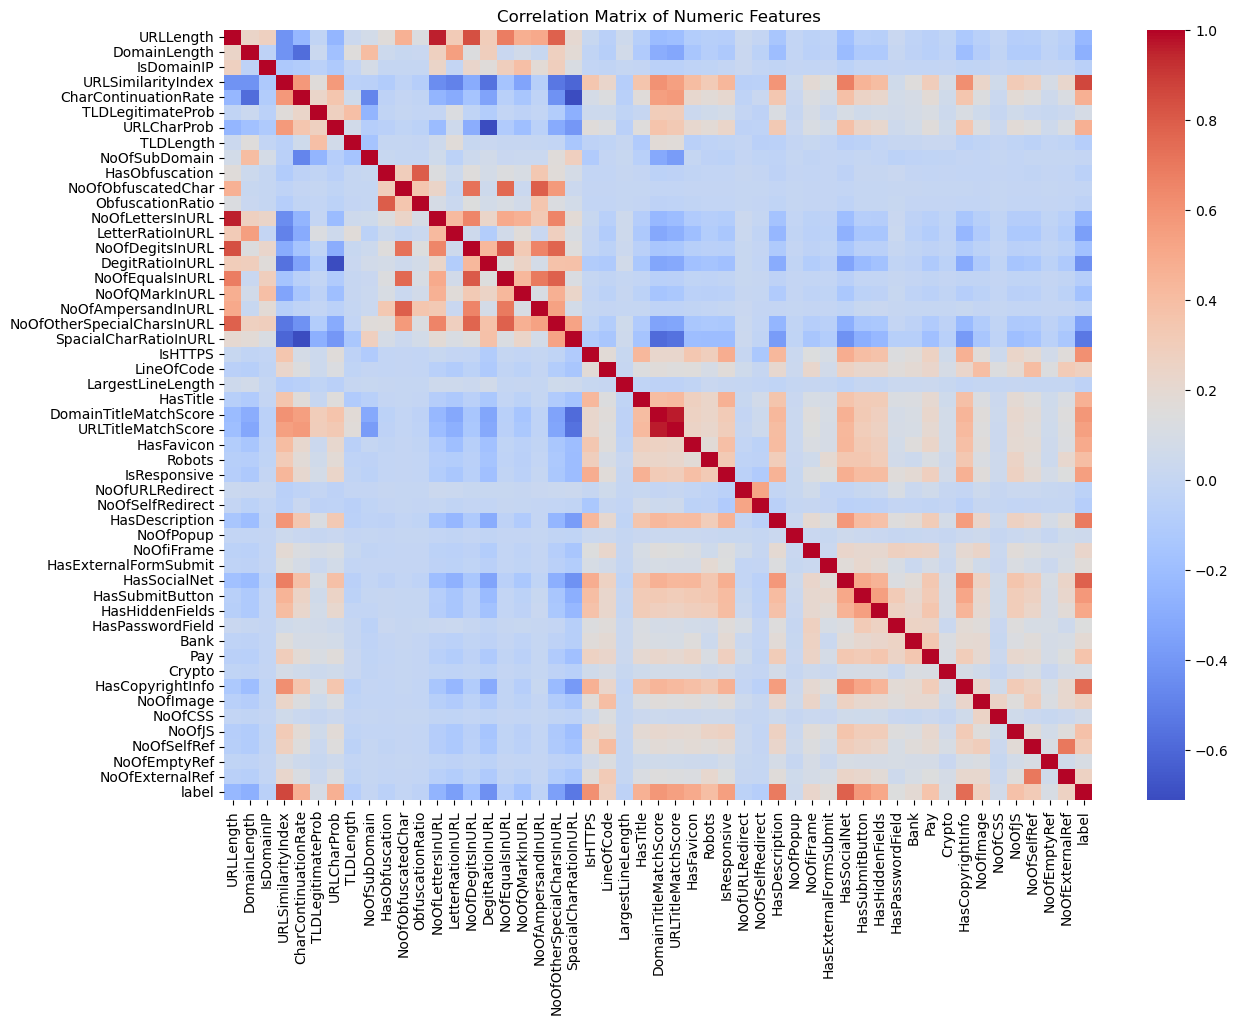

In [215]:
# 2.1 Correlation Analysis
numeric_columns = phishing_url_dataset.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = phishing_url_dataset[numeric_columns].corr()

# 2.1.1 Plot heatmap of correlations
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [216]:
# 2.1.2 Calculate correlations with the label column
correlations_with_label = correlation_matrix['label'].sort_values(ascending=False)

# 2.1.3 Feature Analysis 
important_features = correlations_with_label[correlations_with_label.abs() > 0.2]
eliminated_features = correlations_with_label[correlations_with_label.abs() <= 0.05]

important_features, eliminated_features


(label                         1.000000
 URLSimilarityIndex            0.860358
 HasSocialNet                  0.784255
 HasCopyrightInfo              0.743358
 HasDescription                0.690232
 IsHTTPS                       0.609132
 DomainTitleMatchScore         0.584905
 HasSubmitButton               0.578561
 IsResponsive                  0.548608
 URLTitleMatchScore            0.539419
 HasHiddenFields               0.507731
 HasFavicon                    0.493711
 URLCharProb                   0.469749
 CharContinuationRate          0.467735
 HasTitle                      0.459725
 Robots                        0.392620
 NoOfJS                        0.373500
 Pay                           0.359747
 NoOfSelfRef                   0.316211
 NoOfImage                     0.274658
 LineOfCode                    0.272257
 NoOfExternalRef               0.258627
 NoOfiFrame                    0.225822
 URLLength                    -0.233445
 NoOfLettersInURL             -0.258090


The features showing a strong positive or negive correlation with the label are likely to have significance when predicting whether a URL is phishing or legitimate. Features with (less than or equla to 0.05) negligible correlations are eliminated. On visualizing the distribution of important features wrt label, we can see that it supports the output from correlation analysis.


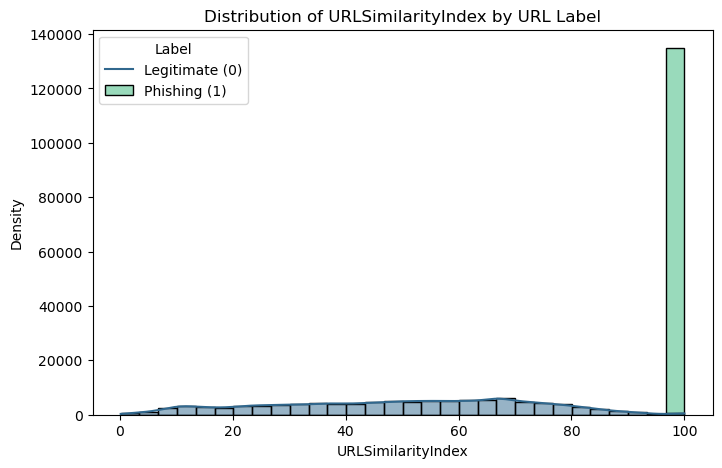

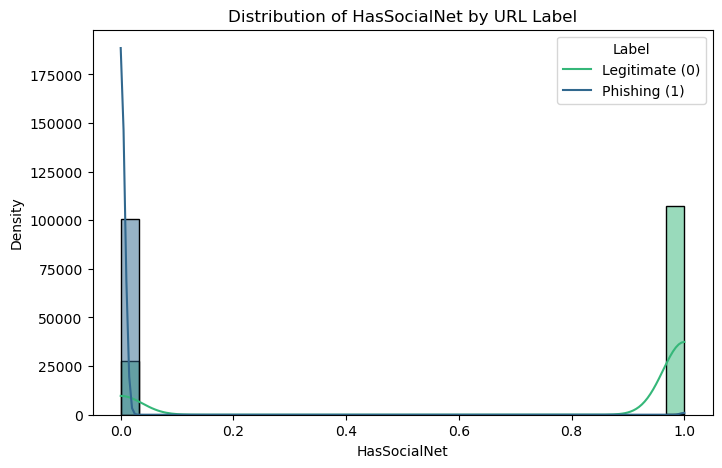

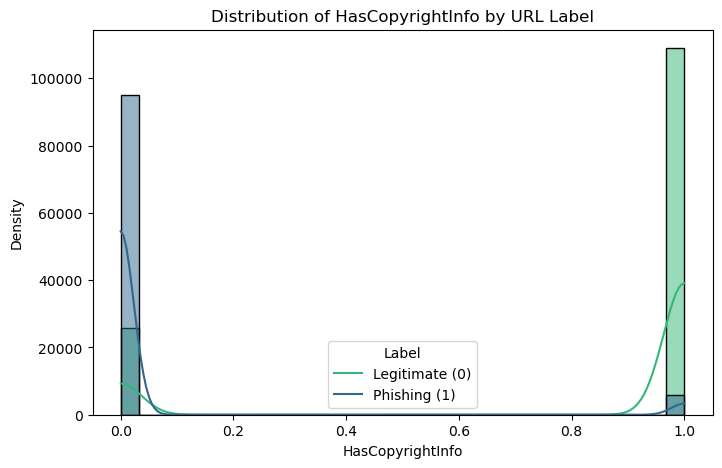

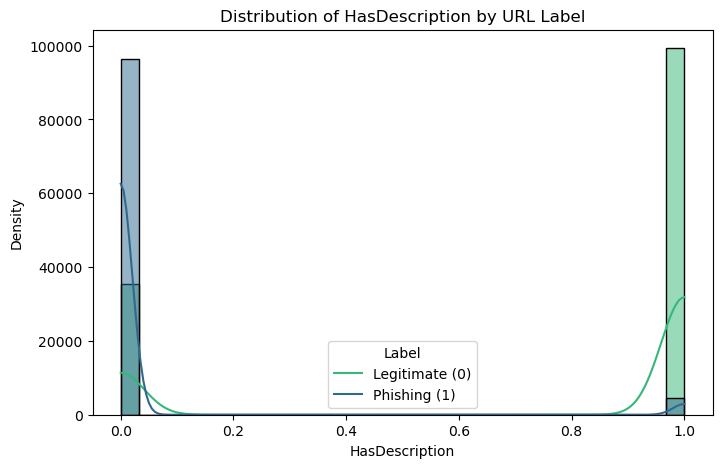

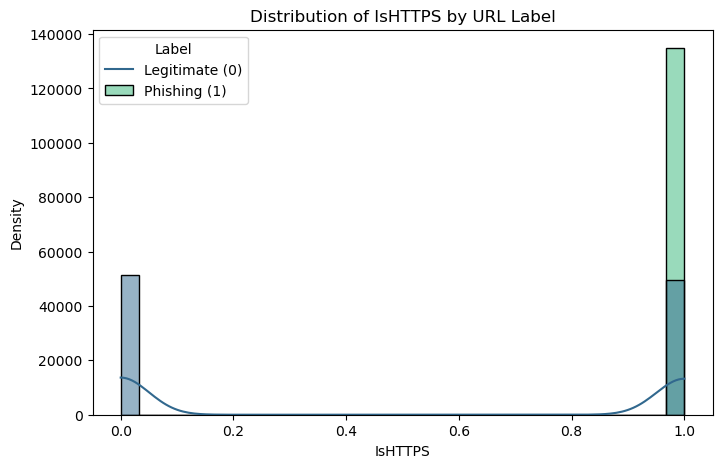

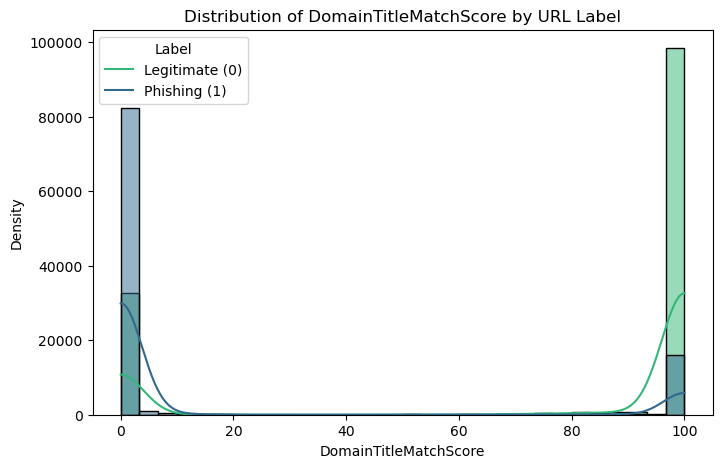

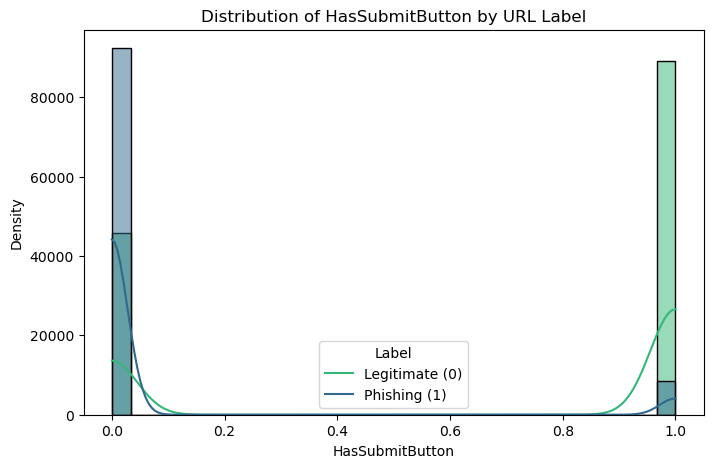

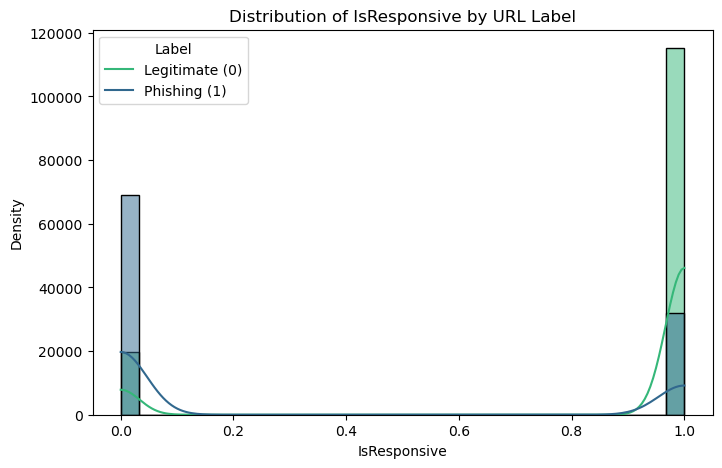

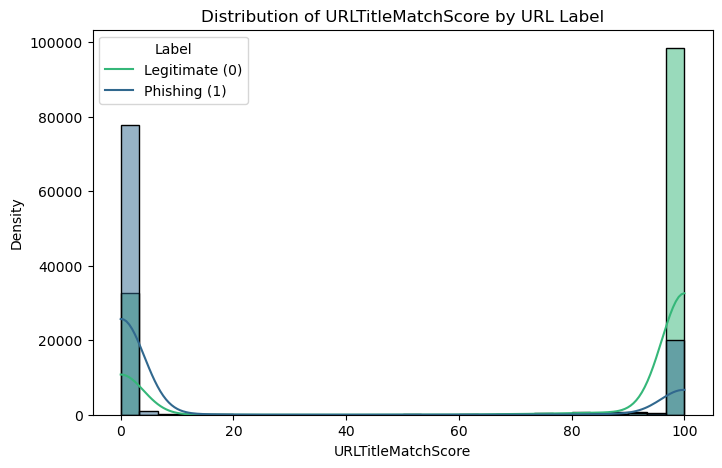

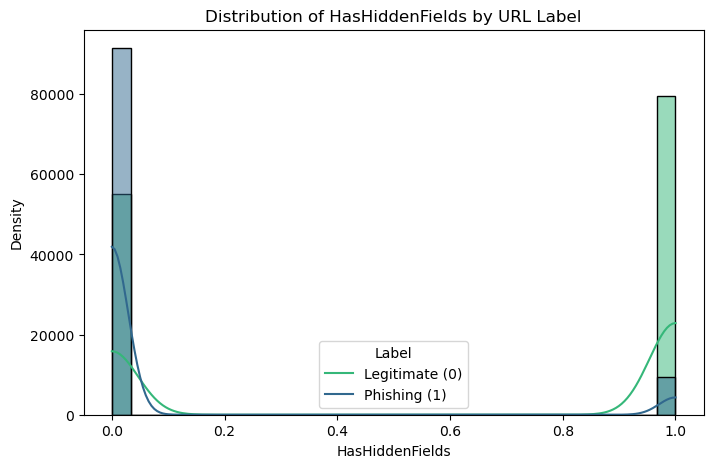

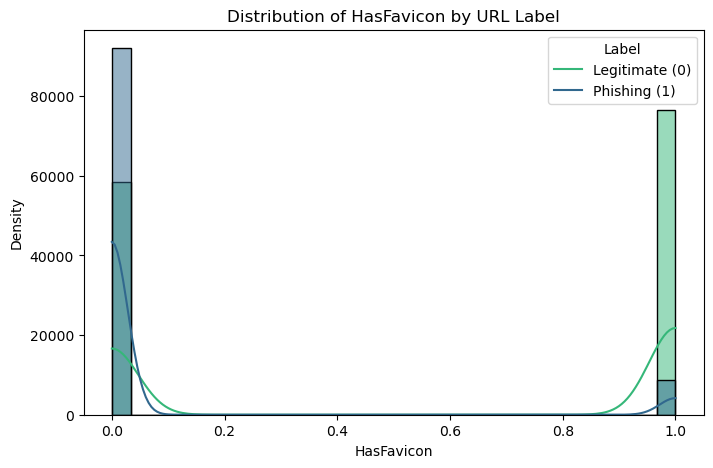

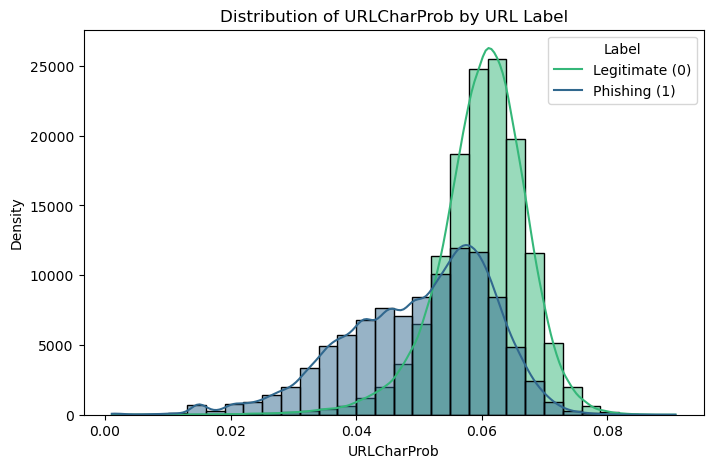

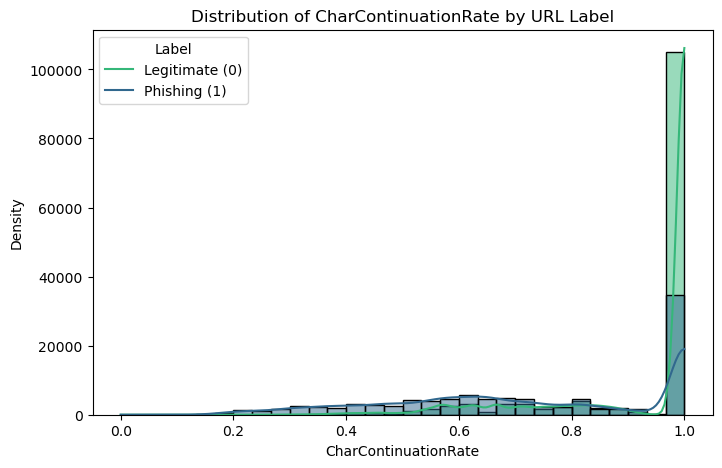

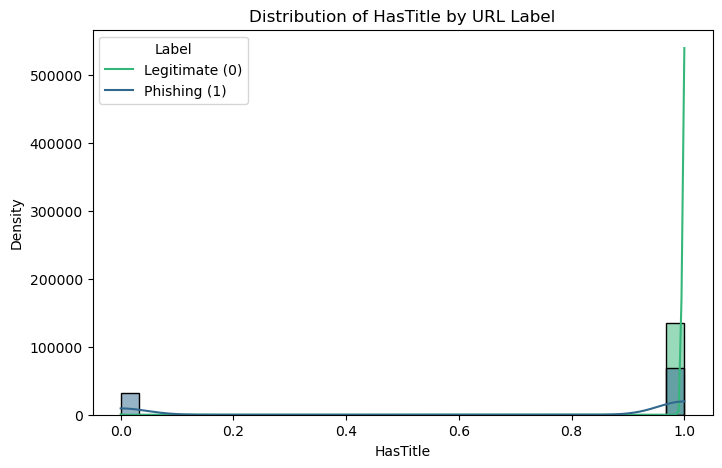

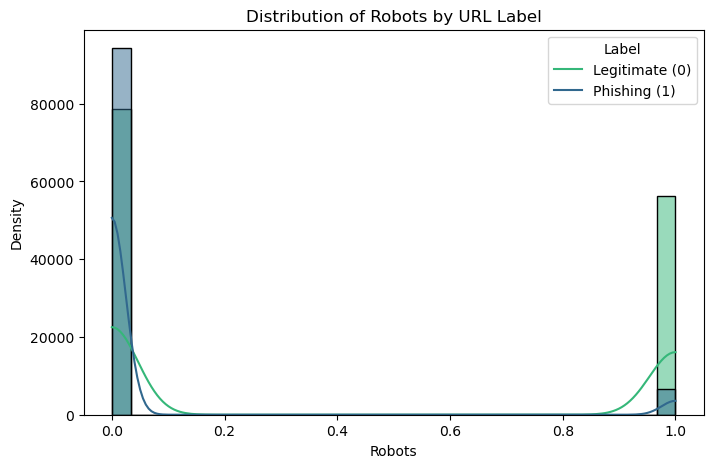

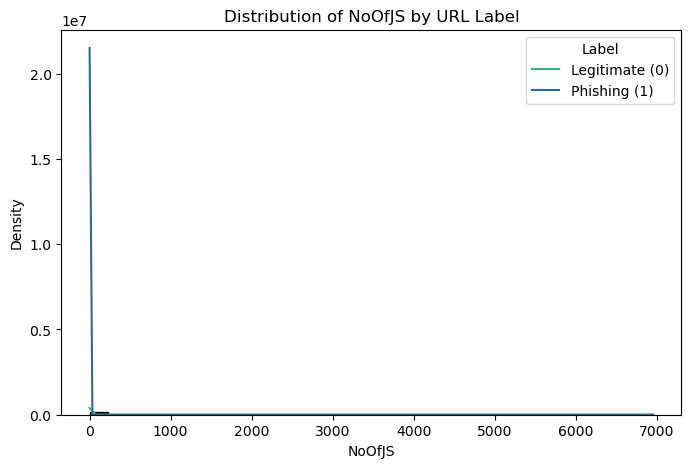

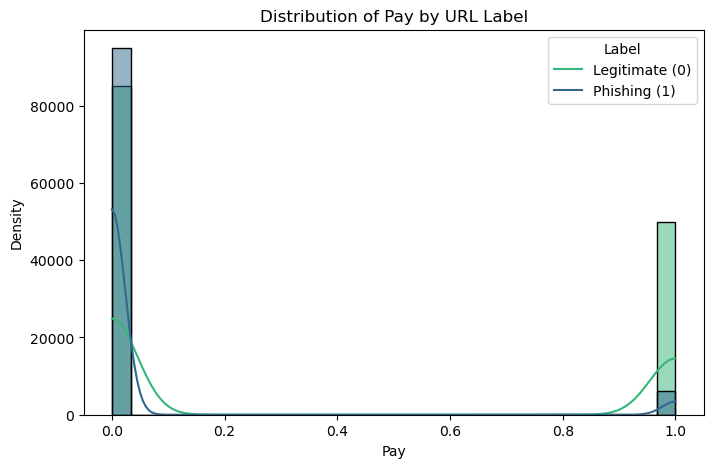

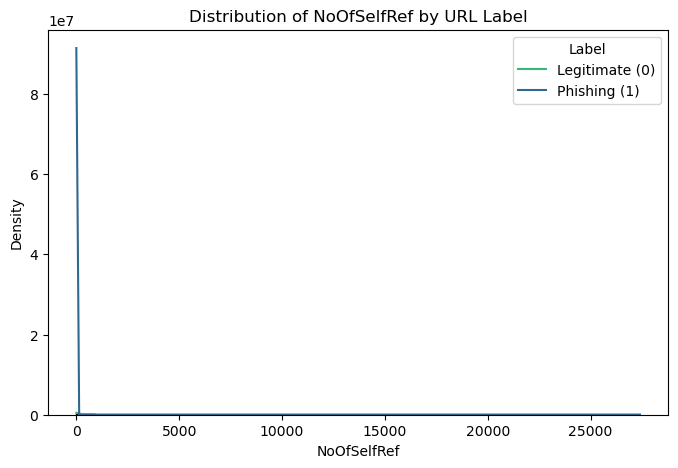

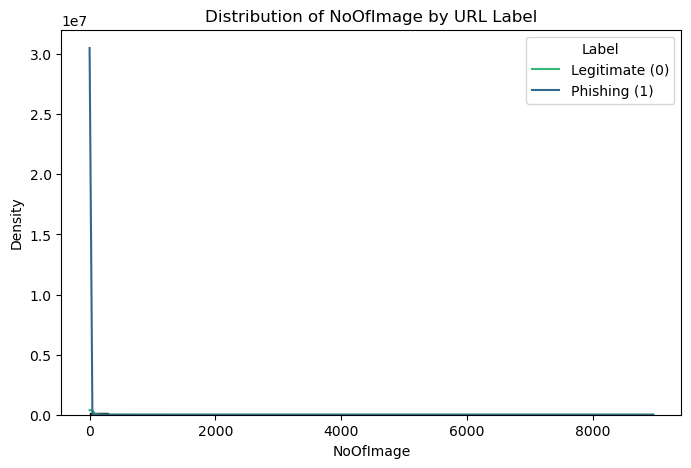

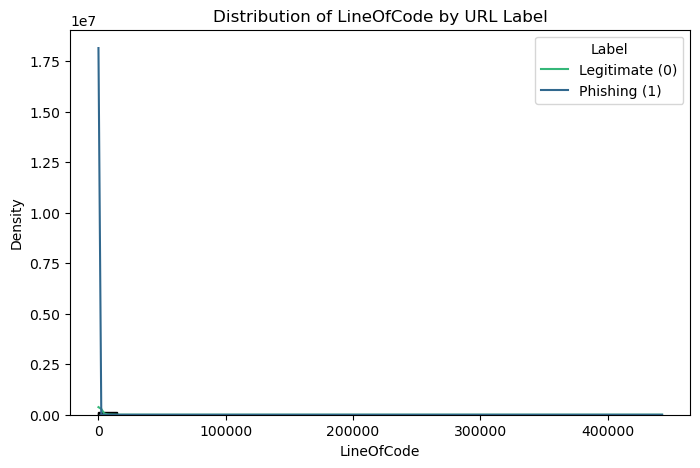

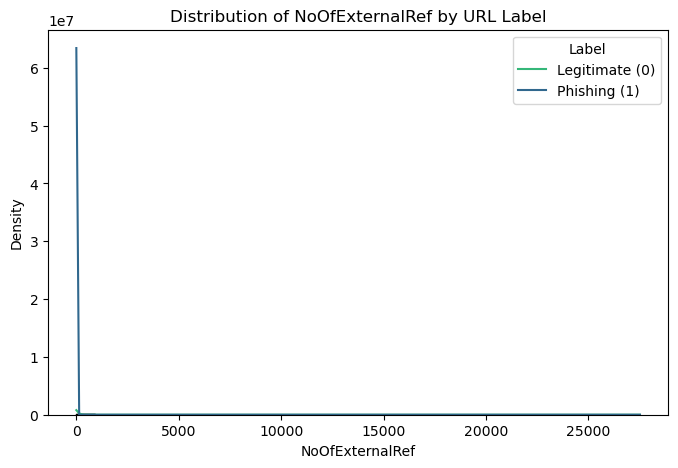

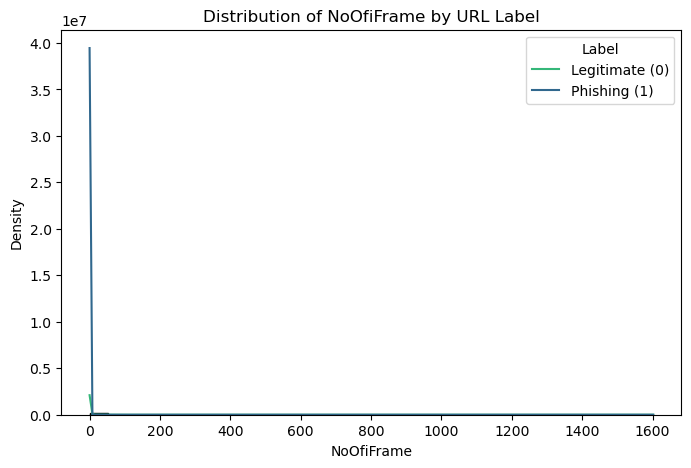

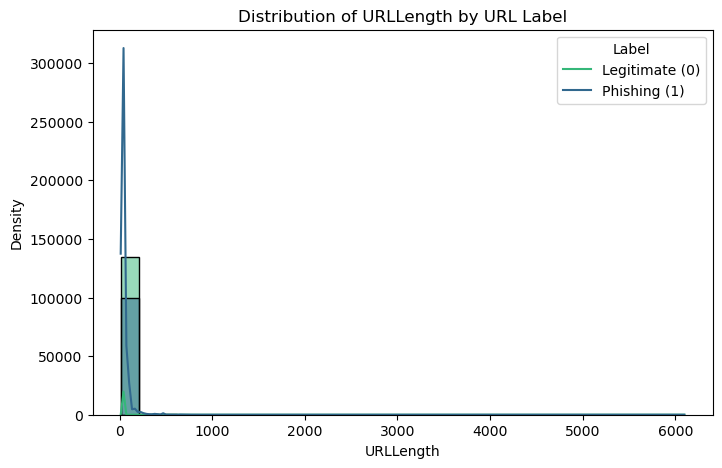

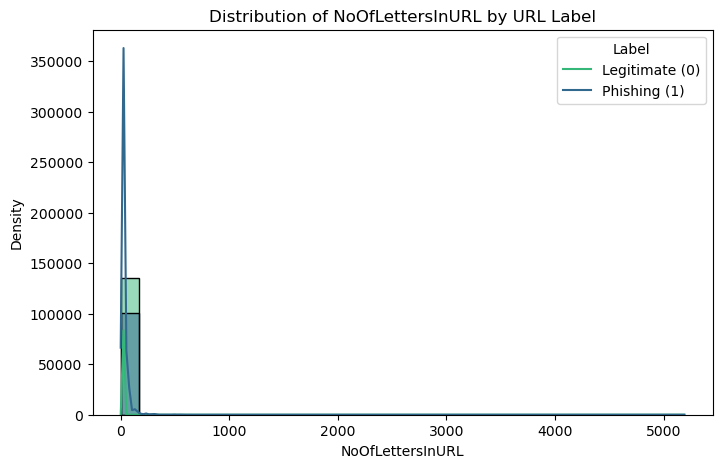

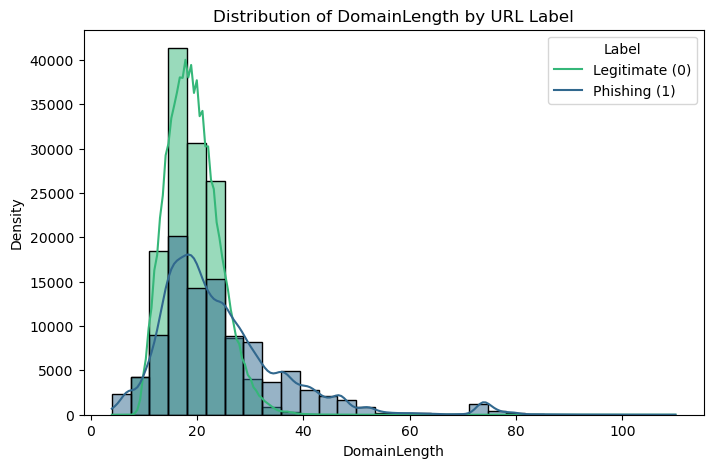

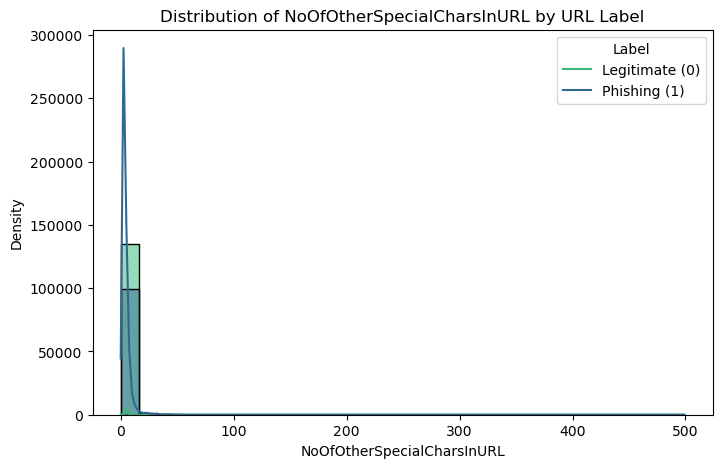

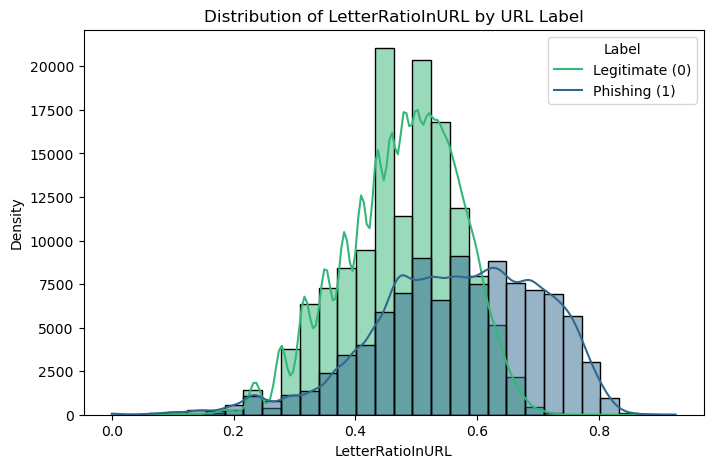

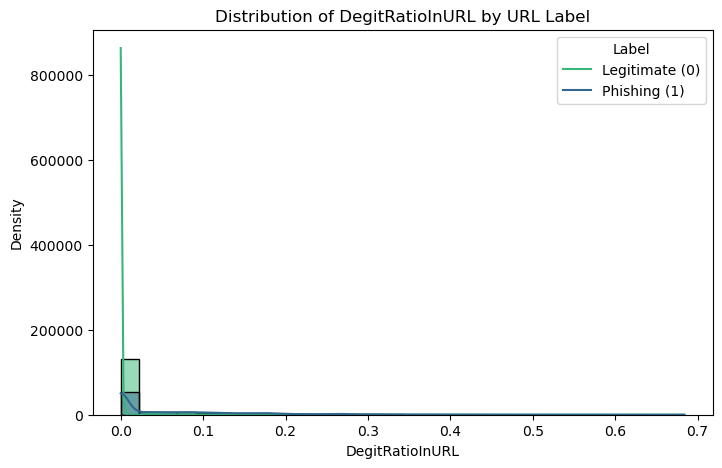

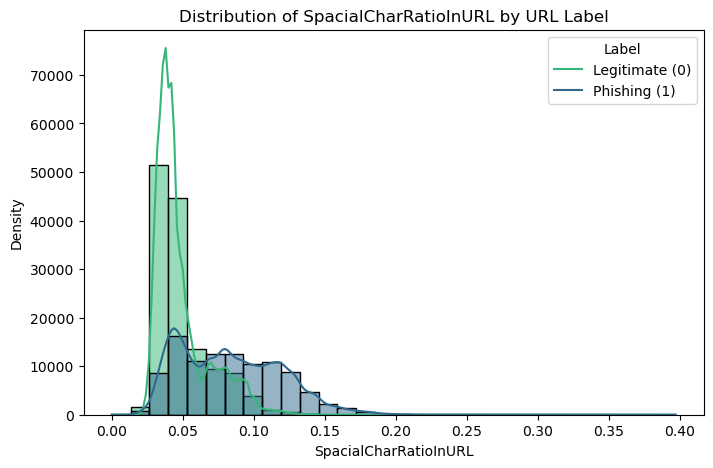

In [218]:
# 2.1.4 visualization of important features
important_features_list = important_features.index.drop('label')

for feature in important_features_list:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=phishing_url_dataset, x=feature, hue="label", kde=True, bins=30, palette="viridis")
    plt.title(f"Distribution of {feature} by URL Label")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend(title="Label", labels=["Legitimate (0)", "Phishing (1)"])
    plt.show()


In [219]:
corr_analysis_features = important_features_list
corr_analysis_features

Index(['URLSimilarityIndex', 'HasSocialNet', 'HasCopyrightInfo',
       'HasDescription', 'IsHTTPS', 'DomainTitleMatchScore', 'HasSubmitButton',
       'IsResponsive', 'URLTitleMatchScore', 'HasHiddenFields', 'HasFavicon',
       'URLCharProb', 'CharContinuationRate', 'HasTitle', 'Robots', 'NoOfJS',
       'Pay', 'NoOfSelfRef', 'NoOfImage', 'LineOfCode', 'NoOfExternalRef',
       'NoOfiFrame', 'URLLength', 'NoOfLettersInURL', 'DomainLength',
       'NoOfOtherSpecialCharsInURL', 'LetterRatioInURL', 'DegitRatioInURL',
       'SpacialCharRatioInURL'],
      dtype='object')

Continuing the feature analysis using forward elimination and L1 regularization. The datasets have been split and standerdized in both cases.

In [221]:
# 2.2 Feature Analysis using forward elimination
X = phishing_url_dataset.drop(columns=['label', 'FILENAME', 'URL', 'Domain', 'TLD', 'Title'])
y = phishing_url_dataset['label']

# 2.2.1 Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2.2.2 splitting the dataset into train and test
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# 2.2.3 Perform forward elimination with scaled features
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

forward_selector_scaled = SequentialFeatureSelector(
    logistic_model, 
    direction='forward', 
    scoring='accuracy', 
    cv=5, 
    n_jobs=-1
)

forward_selector_scaled.fit(X_train_scaled, y_train_scaled)

selected_features_scaled = X.columns[forward_selector_scaled.get_support()]
forward_elimination_features_scaled_list = list(selected_features_scaled)

forward_elimination_features_scaled_list

['IsDomainIP',
 'URLSimilarityIndex',
 'CharContinuationRate',
 'URLCharProb',
 'TLDLength',
 'NoOfSubDomain',
 'HasObfuscation',
 'NoOfObfuscatedChar',
 'ObfuscationRatio',
 'NoOfEqualsInURL',
 'NoOfQMarkInURL',
 'NoOfAmpersandInURL',
 'IsHTTPS',
 'LargestLineLength',
 'HasTitle',
 'Robots',
 'HasDescription',
 'NoOfPopup',
 'NoOfiFrame',
 'HasSocialNet',
 'HasCopyrightInfo',
 'NoOfCSS',
 'NoOfJS',
 'NoOfSelfRef',
 'NoOfEmptyRef']

In [222]:
# 2.3 Feature Analysis using L1 regularization

X = phishing_url_dataset.drop(columns=['label', 'FILENAME', 'URL', 'Domain', 'TLD', 'Title'])
y = phishing_url_dataset['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2.3.1 Defining the pipeline with scaling and logistic regression (with L1 regularization for feature selection)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000))
])

pipeline.fit(X_train, y_train)

# 2.3.2 Extracting feature importance (coefficients) from the model
logistic_model = pipeline.named_steps['logistic']
feature_importance = pd.Series(logistic_model.coef_[0], index=X.columns)

# Selecting the best features (non-zero coefficients)
selected_features_l1 = feature_importance[feature_importance != 0].sort_values(ascending=False)

selected_features_l1


URLSimilarityIndex            9.071794
IsHTTPS                       3.974391
LineOfCode                    3.660308
NoOfImage                     2.997494
NoOfExternalRef               2.466708
NoOfSelfRef                   1.943602
NoOfJS                        1.484073
HasSocialNet                  1.450084
NoOfEqualsInURL               1.342819
NoOfSubDomain                 1.204387
HasCopyrightInfo              1.132665
DomainLength                  1.067630
HasTitle                      1.000664
HasDescription                0.962121
URLLength                     0.542581
HasFavicon                    0.497037
HasHiddenFields               0.361841
HasSubmitButton               0.324499
IsResponsive                  0.318389
NoOfQMarkInURL                0.296542
NoOfLettersInURL              0.212535
ObfuscationRatio              0.184424
DomainTitleMatchScore         0.147346
NoOfAmpersandInURL            0.126616
Pay                           0.115693
Robots                   

III. Handling categorical values. 
- Feature Analysis presents us with only numerical features, eliminating categorical features from it.
- Categorical values in the dataset include filename, URL, domain, TLD, title. 
1. Domain: replacing each value with its frequency in the dataset can help identify commonly used domains ensuring phising.
2. URL: looking for phishing words like "secure," "login," "update" etc.
3. TLD: since this is already a large dataset, to avoid dimensionality issues in one-hot encoding, hence, grouping all low frequency TLDs in other category.
4. Title: Adding features for the length of the title and the count of unique words.

In [224]:

#3.1 Frequency Encoding for 'Domain'
domain_frequency = phishing_url_dataset['Domain'].value_counts()
phishing_url_dataset['Domain_Frequency'] = phishing_url_dataset['Domain'].map(domain_frequency)

#3.2 Keyword Extraction in 'URL'
keywords = ['secure', 'login', 'update', 'account', 'verify']
for keyword in keywords:
    phishing_url_dataset[f'Has_{keyword.capitalize()}'] = phishing_url_dataset['URL'].str.contains(keyword, case=False, na=False).astype(int)

#3.3 Textual Analysis of 'Title'
phishing_url_dataset['Title_Length'] = phishing_url_dataset['Title'].str.len()
phishing_url_dataset['Title_Unique_Words'] = phishing_url_dataset['Title'].apply(lambda x: len(set(str(x).split())) if pd.notnull(x) else 0)

In [225]:
# 3.4 Grouping rare TLDs into "Other" and encoding

tld_counts = phishing_url_dataset['TLD'].value_counts()
rare_tlds = tld_counts[tld_counts < 0.01 * len(phishing_url_dataset)].index
phishing_url_dataset['TLD_Grouped'] = phishing_url_dataset['TLD'].apply(lambda x: 'Other' if x in rare_tlds else x)

# Perform One-Hot Encoding on the grouped TLDs
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_tld_grouped = encoder.fit_transform(phishing_url_dataset[['TLD_Grouped']])
encoded_tld_grouped_df = pd.DataFrame(encoded_tld_grouped, columns=encoder.get_feature_names_out(['TLD_Grouped']))

# Drop the original 'TLD_Grouped' column and replace it with the encoded columns
phishing_url_dataset = phishing_url_dataset.drop(columns=['TLD', 'TLD_Grouped']).reset_index(drop=True)
phishing_url_dataset = pd.concat([phishing_url_dataset, encoded_tld_grouped_df], axis=1)



Filename can provide useful information about phishing, and processing it entails various steps like 
- extracting the length of the filename(longer or shorter filenames can mean phishing),
- extracting the file extension to check if any specific extensions are associated more with phishing, I am encoding lesser present extensions into an other category to reduce dimensionality and
- computed filename frequency.

In [227]:
#3.5 Handling filename column: 
# length of the filename
phishing_url_dataset['Filename_Length'] = phishing_url_dataset['FILENAME'].apply(len)

# Extract the file extension from the filename
phishing_url_dataset['File_Extension'] = phishing_url_dataset['FILENAME'].apply(lambda x: x.split('.')[-1])

# Perform frequency encoding for the filenames
phishing_url_dataset['Filename_Frequency'] = phishing_url_dataset['FILENAME'].map(phishing_url_dataset['FILENAME'].value_counts())

# Group rare file extensions into an "Other" category
file_extension_counts = phishing_url_dataset['File_Extension'].value_counts()
rare_extensions = file_extension_counts[file_extension_counts < 5].index
phishing_url_dataset['File_Extension'] = phishing_url_dataset['File_Extension'].apply(
    lambda x: 'Other' if x in rare_extensions else x
)

# One-Hot Encode the processed 'File_Extension' column
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_file_ext = encoder.fit_transform(phishing_url_dataset[['File_Extension']])
encoded_file_ext_df = pd.DataFrame(encoded_file_ext, columns=encoder.get_feature_names_out(['File_Extension']))

# Drop original 'FILENAME' and 'File_Extension' columns and merge encoded features
phishing_url_dataset = phishing_url_dataset.drop(columns=['FILENAME', 'File_Extension']).reset_index(drop=True)
phishing_url_dataset = pd.concat([phishing_url_dataset, encoded_file_ext_df], axis=1)



In [228]:
phishing_url_dataset = phishing_url_dataset.drop(columns=['URL', 'Domain', 'Title']).reset_index(drop=True)
# final encoded dataset
phishing_url_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 73 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   IsDomainIP                  235795 non-null  int64  
 3   URLSimilarityIndex          235795 non-null  float64
 4   CharContinuationRate        235795 non-null  float64
 5   TLDLegitimateProb           235795 non-null  float64
 6   URLCharProb                 235795 non-null  float64
 7   TLDLength                   235795 non-null  int64  
 8   NoOfSubDomain               235795 non-null  int64  
 9   HasObfuscation              235795 non-null  int64  
 10  NoOfObfuscatedChar          235795 non-null  int64  
 11  ObfuscationRatio            235795 non-null  float64
 12  NoOfLettersInURL            235795 non-null  int64  
 13  LetterRatioInU

Creating three different datasets with three feature sets combined with categorical variables. Since our methods of feature analysis exclude object types, I am including them back here.

In [230]:
# Create the categorical_variables_df
categorical_features = [
    'Domain_Frequency',
    'Has_Secure', 'Has_Login', 'Has_Update', 'Has_Account', 'Has_Verify',
    'Title_Length', 'Title_Unique_Words'
]

categorical_features += [col for col in phishing_url_dataset.columns if col.startswith('TLD_Grouped_')]
categorical_features += [col for col in phishing_url_dataset.columns if col.startswith('File_Extension_')]

categorical_features_df = phishing_url_dataset[categorical_features].copy()

categorical_features_df.info()
categorical_features_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Domain_Frequency    235795 non-null  int64  
 1   Has_Secure          235795 non-null  int32  
 2   Has_Login           235795 non-null  int32  
 3   Has_Update          235795 non-null  int32  
 4   Has_Account         235795 non-null  int32  
 5   Has_Verify          235795 non-null  int32  
 6   Title_Length        235795 non-null  int64  
 7   Title_Unique_Words  235795 non-null  int64  
 8   TLD_Grouped_Other   235795 non-null  float64
 9   TLD_Grouped_app     235795 non-null  float64
 10  TLD_Grouped_au      235795 non-null  float64
 11  TLD_Grouped_co      235795 non-null  float64
 12  TLD_Grouped_com     235795 non-null  float64
 13  TLD_Grouped_de      235795 non-null  float64
 14  TLD_Grouped_io      235795 non-null  float64
 15  TLD_Grouped_net     235795 non-nul

,Domain_Frequency,Has_Secure,Has_Login,Has_Update,Has_Account,Has_Verify,Title_Length,Title_Unique_Words,TLD_Grouped_Other,TLD_Grouped_app,TLD_Grouped_au,TLD_Grouped_co,TLD_Grouped_com,TLD_Grouped_de,TLD_Grouped_io,TLD_Grouped_net,TLD_Grouped_org,TLD_Grouped_ru,TLD_Grouped_uk,File_Extension_txt
0,1,0,0,0,0,0,487,10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,0,0,0,0,37,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,0,0,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1,0,0,0,0,0,51,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,0,0,0,0,30,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [231]:
# Combining the extracted features with the new categorical variables into three datasets

# 1. Combine correlation analysis features with new categorical variables
dataset_corr_analysis = phishing_url_dataset[corr_analysis_features].copy()
dataset_corr_analysis = pd.concat([dataset_corr_analysis, categorical_features_df], axis=1)

# 2. Combine forward elimination features with new categorical variables
dataset_forward_elimination = phishing_url_dataset[forward_elimination_features_scaled_list].copy()
dataset_forward_elimination = pd.concat([dataset_forward_elimination, categorical_features_df], axis=1)

# 3. Combine L1-regularized features with new categorical variables
dataset_l1_regularization = phishing_url_dataset[selected_features_l1.index].copy()
dataset_l1_regularization = pd.concat([dataset_l1_regularization, categorical_features_df], axis=1)

dataset_corr_analysis.info(), dataset_forward_elimination.info(), dataset_l1_regularization.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 49 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLSimilarityIndex          235795 non-null  float64
 1   HasSocialNet                235795 non-null  int64  
 2   HasCopyrightInfo            235795 non-null  int64  
 3   HasDescription              235795 non-null  int64  
 4   IsHTTPS                     235795 non-null  int64  
 5   DomainTitleMatchScore       235795 non-null  float64
 6   HasSubmitButton             235795 non-null  int64  
 7   IsResponsive                235795 non-null  int64  
 8   URLTitleMatchScore          235795 non-null  float64
 9   HasHiddenFields             235795 non-null  int64  
 10  HasFavicon                  235795 non-null  int64  
 11  URLCharProb                 235795 non-null  float64
 12  CharContinuationRate        235795 non-null  float64
 13  HasTitle      

(None, None, None)

IV. Model Training.
- The key objective of this project is to predict if a url is phising or not.
- Training 3 feature datasets on logistic regression, desicion tree and random forest models and comparing performance. 

In [233]:
#4.1 Splitting the datasets into train, validation, and test sets

# Target variable
y = phishing_url_dataset['label']

# dataset_corr_analysis
X_corr_analysis = dataset_corr_analysis
X_train_corr_analysis, X_temp_corr_analysis, y_train_corr_analysis, y_temp_corr_analysis = train_test_split(
    X_corr_analysis, y, test_size=0.4, random_state=42, stratify=y
)
X_val_corr_analysis, X_test_corr_analysis, y_val_corr_analysis, y_test_corr_analysis = train_test_split(
    X_temp_corr_analysis, y_temp_corr_analysis, test_size=0.5, random_state=42, stratify=y_temp_corr_analysis
)

# dataset_forward_elimination
X_forward_elimination = dataset_forward_elimination
X_train_forward_elimination, X_temp_forward_elimination, y_train_forward_elimination, y_temp_forward_elimination = train_test_split(
    X_forward_elimination, y, test_size=0.4, random_state=42, stratify=y
)
X_val_forward_elimination, X_test_forward_elimination, y_val_forward_elimination, y_test_forward_elimination = train_test_split(
    X_temp_forward_elimination, y_temp_forward_elimination, test_size=0.5, random_state=42, stratify=y_temp_forward_elimination
)

# dataset_l1_regularization
X_l1_regularization = dataset_l1_regularization
X_train_l1_regularization, X_temp_l1_regularization, y_train_l1_regularization, y_temp_l1_regularization = train_test_split(
    X_l1_regularization, y, test_size=0.4, random_state=42, stratify=y
)
X_val_l1_regularization, X_test_l1_regularization, y_val_l1_regularization, y_test_l1_regularization = train_test_split(
    X_temp_l1_regularization, y_temp_l1_regularization, test_size=0.5, random_state=42, stratify=y_temp_l1_regularization
)

(X_train_corr_analysis.shape, X_val_corr_analysis.shape, X_test_corr_analysis.shape,
 X_train_forward_elimination.shape, X_val_forward_elimination.shape, X_test_forward_elimination.shape,
 X_train_l1_regularization.shape, X_val_l1_regularization.shape, X_test_l1_regularization.shape)


((141477, 49),
 (47159, 49),
 (47159, 49),
 (141477, 45),
 (47159, 45),
 (47159, 45),
 (141477, 64),
 (47159, 64),
 (47159, 64))

In [234]:
#4.2 Standardize the datasets
scaler = StandardScaler()

# correlation analysis
X_train_corr_analysis_scaled = scaler.fit_transform(X_train_corr_analysis)
X_val_corr_analysis_scaled = scaler.transform(X_val_corr_analysis)
X_test_corr_analysis_scaled = scaler.transform(X_test_corr_analysis)

# forward elimination
X_train_forward_elimination_scaled = scaler.fit_transform(X_train_forward_elimination)
X_val_forward_elimination_scaled = scaler.transform(X_val_forward_elimination)
X_test_forward_elimination_scaled = scaler.transform(X_test_forward_elimination)

# L1 regularization
X_train_l1_regularization_scaled = scaler.fit_transform(X_train_l1_regularization)
X_val_l1_regularization_scaled = scaler.transform(X_val_l1_regularization)
X_test_l1_regularization_scaled = scaler.transform(X_test_l1_regularization)

(X_train_corr_analysis_scaled.shape, X_val_corr_analysis_scaled.shape, X_test_corr_analysis_scaled.shape,
 X_train_forward_elimination_scaled.shape, X_val_forward_elimination_scaled.shape, X_test_forward_elimination_scaled.shape,
 X_train_l1_regularization_scaled.shape, X_val_l1_regularization_scaled.shape, X_test_l1_regularization_scaled.shape)


((141477, 49),
 (47159, 49),
 (47159, 49),
 (141477, 45),
 (47159, 45),
 (47159, 45),
 (141477, 64),
 (47159, 64),
 (47159, 64))

V. Training dataset_corr_analysis, dataset_forward_elimination, dataset_l1_regularization on logistic regression, desicion tree and random forest.

In [236]:
# 5.1 logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Correlation Analysis
logistic_model.fit(X_train_corr_analysis_scaled, y_train_corr_analysis)
y_train_corr_analysis_pred = logistic_model.predict(X_train_corr_analysis_scaled)
accuracy_corr_analysis_train = accuracy_score(y_train_corr_analysis, y_train_corr_analysis_pred)

# Forward Elimination
logistic_model.fit(X_train_forward_elimination_scaled, y_train_forward_elimination)
y_train_forward_elimination_pred = logistic_model.predict(X_train_forward_elimination_scaled)
accuracy_forward_elimination_train = accuracy_score(y_train_forward_elimination, y_train_forward_elimination_pred)

# L1 Regularization
logistic_model.fit(X_train_l1_regularization_scaled, y_train_l1_regularization)
y_train_l1_regularization_pred = logistic_model.predict(X_train_l1_regularization_scaled)
accuracy_l1_regularization_train = accuracy_score(y_train_l1_regularization, y_train_l1_regularization_pred)

# training accuracies for logistic regression
accuracy_corr_analysis_train, accuracy_forward_elimination_train, accuracy_l1_regularization_train


(0.9998798391257943, 0.9998515659789223, 0.9998939756992302)

In [237]:

# 5.2 Decision tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Correlation Analysis
decision_tree_model.fit(X_train_corr_analysis_scaled, y_train_corr_analysis)
y_train_corr_analysis_pred_tree = decision_tree_model.predict(X_train_corr_analysis_scaled)
accuracy_corr_analysis_tree_train = accuracy_score(y_train_corr_analysis, y_train_corr_analysis_pred_tree)

# Forward Elimination
decision_tree_model.fit(X_train_forward_elimination_scaled, y_train_forward_elimination)
y_train_forward_elimination_pred_tree = decision_tree_model.predict(X_train_forward_elimination_scaled)
accuracy_forward_elimination_tree_train = accuracy_score(y_train_forward_elimination, y_train_forward_elimination_pred_tree)

# L1 Regularization
decision_tree_model.fit(X_train_l1_regularization_scaled, y_train_l1_regularization)
y_train_l1_regularization_pred_tree = decision_tree_model.predict(X_train_l1_regularization_scaled)
accuracy_l1_regularization_tree_train = accuracy_score(y_train_l1_regularization, y_train_l1_regularization_pred_tree)

# training accuracies for decision tree
accuracy_corr_analysis_tree_train, accuracy_forward_elimination_tree_train, accuracy_l1_regularization_tree_train


(1.0, 1.0, 1.0)

In [238]:
# 5.3 Random Forest model
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Correlation Analysis
random_forest_model.fit(X_train_corr_analysis_scaled, y_train_corr_analysis)
y_train_corr_analysis_pred_rf = random_forest_model.predict(X_train_corr_analysis_scaled)
accuracy_corr_analysis_rf_train = accuracy_score(y_train_corr_analysis, y_train_corr_analysis_pred_rf)

# Forward Elimination
random_forest_model.fit(X_train_forward_elimination_scaled, y_train_forward_elimination)
y_train_forward_elimination_pred_rf = random_forest_model.predict(X_train_forward_elimination_scaled)
accuracy_forward_elimination_rf_train = accuracy_score(y_train_forward_elimination, y_train_forward_elimination_pred_rf)

# L1 Regularization
random_forest_model.fit(X_train_l1_regularization_scaled, y_train_l1_regularization)
y_train_l1_regularization_pred_rf = random_forest_model.predict(X_train_l1_regularization_scaled)
accuracy_l1_regularization_rf_train = accuracy_score(y_train_l1_regularization, y_train_l1_regularization_pred_rf)

# accuracies for Random Forest
accuracy_corr_analysis_rf_train, accuracy_forward_elimination_rf_train, accuracy_l1_regularization_rf_train


(1.0, 1.0, 1.0)

VI. Evaluating the models on validation datasets. I will proceed with tuning the parametres if the accuracy of validation dataset is not good.

In [240]:
# 6.1 Evaluating models on validation datasets for Logistic Regression, Decision Tree, and Random Forest

validation_accuracies = {
    "Logistic Regression": {},
    "Decision Tree": {},
    "Random Forest": {}
}

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
validation_accuracies["Logistic Regression"]["Correlation Analysis"] = accuracy_score(
    y_val_corr_analysis,
    logistic_model.fit(X_train_corr_analysis_scaled, y_train_corr_analysis).predict(X_val_corr_analysis_scaled)
)
validation_accuracies["Logistic Regression"]["Forward Elimination"] = accuracy_score(
    y_val_forward_elimination,
    logistic_model.fit(X_train_forward_elimination_scaled, y_train_forward_elimination).predict(X_val_forward_elimination_scaled)
)
validation_accuracies["Logistic Regression"]["L1 Regularization"] = accuracy_score(
    y_val_l1_regularization,
    logistic_model.fit(X_train_l1_regularization_scaled, y_train_l1_regularization).predict(X_val_l1_regularization_scaled)
)

# Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
validation_accuracies["Decision Tree"]["Correlation Analysis"] = accuracy_score(
    y_val_corr_analysis,
    decision_tree_model.fit(X_train_corr_analysis_scaled, y_train_corr_analysis).predict(X_val_corr_analysis_scaled)
)
validation_accuracies["Decision Tree"]["Forward Elimination"] = accuracy_score(
    y_val_forward_elimination,
    decision_tree_model.fit(X_train_forward_elimination_scaled, y_train_forward_elimination).predict(X_val_forward_elimination_scaled)
)
validation_accuracies["Decision Tree"]["L1 Regularization"] = accuracy_score(
    y_val_l1_regularization,
    decision_tree_model.fit(X_train_l1_regularization_scaled, y_train_l1_regularization).predict(X_val_l1_regularization_scaled)
)

# Random Forest
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
validation_accuracies["Random Forest"]["Correlation Analysis"] = accuracy_score(
    y_val_corr_analysis,
    random_forest_model.fit(X_train_corr_analysis_scaled, y_train_corr_analysis).predict(X_val_corr_analysis_scaled)
)
validation_accuracies["Random Forest"]["Forward Elimination"] = accuracy_score(
    y_val_forward_elimination,
    random_forest_model.fit(X_train_forward_elimination_scaled, y_train_forward_elimination).predict(X_val_forward_elimination_scaled)
)
validation_accuracies["Random Forest"]["L1 Regularization"] = accuracy_score(
    y_val_l1_regularization,
    random_forest_model.fit(X_train_l1_regularization_scaled, y_train_l1_regularization).predict(X_val_l1_regularization_scaled)
)

# validation accuracies
validation_accuracies


{'Logistic Regression': {'Correlation Analysis': 0.9998515659789223,
  'Forward Elimination': 0.9997879513984606,
  'L1 Regularization': 0.9998939756992302},
 'Decision Tree': {'Correlation Analysis': 0.999978795139846,
  'Forward Elimination': 0.9998939756992302,
  'L1 Regularization': 1.0},
 'Random Forest': {'Correlation Analysis': 0.999978795139846,
  'Forward Elimination': 0.9999363854195381,
  'L1 Regularization': 0.999978795139846}}

In [241]:
# 6.2 Calculating evaluation metrics like precision, recall, f1 score and accuracy.

validation_metrics = {
    "Logistic Regression": {},
    "Decision Tree": {},
    "Random Forest": {}
}

# 6.2.1 Logistic Regression
#  Correlation Analysis
validation_metrics["Logistic Regression"]["Correlation Analysis"] = compute_metrics(
    y_val_corr_analysis, logistic_model.fit(X_train_corr_analysis_scaled, y_train_corr_analysis).predict(X_val_corr_analysis_scaled)
)

# Forward Elimination
validation_metrics["Logistic Regression"]["Forward Elimination"] = compute_metrics(
    y_val_forward_elimination, logistic_model.fit(X_train_forward_elimination_scaled, y_train_forward_elimination).predict(X_val_forward_elimination_scaled)
)

# L1 Regularization
validation_metrics["Logistic Regression"]["L1 Regularization"] = compute_metrics(
    y_val_l1_regularization, logistic_model.fit(X_train_l1_regularization_scaled, y_train_l1_regularization).predict(X_val_l1_regularization_scaled)
)

# 6.2.2 Decision Tree
# Correlation Analysis
validation_metrics["Decision Tree"]["Correlation Analysis"] = compute_metrics(
    y_val_corr_analysis, decision_tree_model.fit(X_train_corr_analysis_scaled, y_train_corr_analysis).predict(X_val_corr_analysis_scaled)
)

# Forward Elimination
validation_metrics["Decision Tree"]["Forward Elimination"] = compute_metrics(
    y_val_forward_elimination, decision_tree_model.fit(X_train_forward_elimination_scaled, y_train_forward_elimination).predict(X_val_forward_elimination_scaled)
)

# L1 Regularization
validation_metrics["Decision Tree"]["L1 Regularization"] = compute_metrics(
    y_val_l1_regularization, decision_tree_model.fit(X_train_l1_regularization_scaled, y_train_l1_regularization).predict(X_val_l1_regularization_scaled)
)

# 6.2.3 Random Forest
# Correlation Analysis
validation_metrics["Random Forest"]["Correlation Analysis"] = compute_metrics(
    y_val_corr_analysis, random_forest_model.fit(X_train_corr_analysis_scaled, y_train_corr_analysis).predict(X_val_corr_analysis_scaled)
)

# Forward Elimination
validation_metrics["Random Forest"]["Forward Elimination"] = compute_metrics(
    y_val_forward_elimination, random_forest_model.fit(X_train_forward_elimination_scaled, y_train_forward_elimination).predict(X_val_forward_elimination_scaled)
)

# L1 Regularization
validation_metrics["Random Forest"]["L1 Regularization"] = compute_metrics(
    y_val_l1_regularization, random_forest_model.fit(X_train_l1_regularization_scaled, y_train_l1_regularization).predict(X_val_l1_regularization_scaled)
)

# validation metrics
validation_metrics


{'Logistic Regression': {'Correlation Analysis': {'Accuracy': 0.9998515659789223,
   'Precision': 0.9997405197019683,
   'Recall': 1.0,
   'F1-Score': 0.9998702430162938},
  'Forward Elimination': {'Accuracy': 0.9997879513984606,
   'Precision': 0.9996293550778355,
   'Recall': 1.0,
   'F1-Score': 0.9998146431881372},
  'L1 Regularization': {'Accuracy': 0.9998939756992302,
   'Precision': 0.9998146431881372,
   'Recall': 1.0,
   'F1-Score': 0.9999073130039855}},
 'Decision Tree': {'Correlation Analysis': {'Accuracy': 0.999978795139846,
   'Precision': 1.0,
   'Recall': 0.999962921764924,
   'F1-Score': 0.9999814605387567},
  'Forward Elimination': {'Accuracy': 0.9998939756992302,
   'Precision': 0.9998517035554073,
   'Recall': 0.999962921764924,
   'F1-Score': 0.9999073095675064},
  'L1 Regularization': {'Accuracy': 1.0,
   'Precision': 1.0,
   'Recall': 1.0,
   'F1-Score': 1.0}},
 'Random Forest': {'Correlation Analysis': {'Accuracy': 0.999978795139846,
   'Precision': 0.999962923139

In [242]:
# 6.3 Create a dataframe to show validation metrics
def format_metrics(metrics_dict, model_name):
    records = []
    for dataset_name, metrics in metrics_dict.items():
        record = {"Model": model_name, "Dataset": dataset_name}
        record.update(metrics)
        records.append(record)
    return records

logistic_metrics = format_metrics(validation_metrics["Logistic Regression"], "Logistic Regression")
decision_tree_metrics = format_metrics(validation_metrics["Decision Tree"], "Decision Tree")
random_forest_metrics = format_metrics(validation_metrics["Random Forest"], "Random Forest")

comparison_df = pd.DataFrame(logistic_metrics + decision_tree_metrics + random_forest_metrics)
comparison_df

,Model,Dataset,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,Correlation Analysis,0.999852,0.999741,1.000000,0.999870
1,Logistic Regression,Forward Elimination,0.999788,0.999629,1.000000,0.999815
2,Logistic Regression,L1 Regularization,0.999894,0.999815,1.000000,0.999907
3,Decision Tree,Correlation Analysis,0.999979,1.000000,0.999963,0.999981
4,Decision Tree,Forward Elimination,0.999894,0.999852,0.999963,0.999907
5,Decision Tree,L1 Regularization,1.000000,1.000000,1.000000,1.000000
6,Random Forest,Correlation Analysis,0.999979,0.999963,1.000000,0.999981
7,Random Forest,Forward Elimination,0.999936,0.999889,1.000000,0.999944
8,Random Forest,L1 Regularization,0.999979,0.999963,1.000000,0.999981


We have good accuracy on validation dataset. Proceeding to test the same on test dataset.

VII. Evaluating the models on test datasets. I will proceed with tuning the parametres if the accuracy of test dataset is not good.

In [245]:
# 7.1 Evaluating the models on test datasets.
test_accuracies = {
    "Logistic Regression": {},
    "Decision Tree": {},
    "Random Forest": {}
}

# 7.1.1 Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
# Correlation Analysis
logistic_model.fit(X_train_corr_analysis_scaled, y_train_corr_analysis)
y_test_corr_analysis_pred = logistic_model.predict(X_test_corr_analysis_scaled)
test_accuracies["Logistic Regression"]["Correlation Analysis"] = accuracy_score(y_test_corr_analysis, y_test_corr_analysis_pred)

# Forward Elimination
logistic_model.fit(X_train_forward_elimination_scaled, y_train_forward_elimination)
y_test_forward_elimination_pred = logistic_model.predict(X_test_forward_elimination_scaled)
test_accuracies["Logistic Regression"]["Forward Elimination"] = accuracy_score(y_test_forward_elimination, y_test_forward_elimination_pred)

# L1 Regularization
logistic_model.fit(X_train_l1_regularization_scaled, y_train_l1_regularization)
y_test_l1_regularization_pred = logistic_model.predict(X_test_l1_regularization_scaled)
test_accuracies["Logistic Regression"]["L1 Regularization"] = accuracy_score(y_test_l1_regularization, y_test_l1_regularization_pred)

# 7.1.2 Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
# Correlation Analysis
decision_tree_model.fit(X_train_corr_analysis_scaled, y_train_corr_analysis)
y_test_corr_analysis_pred = decision_tree_model.predict(X_test_corr_analysis_scaled)
test_accuracies["Decision Tree"]["Correlation Analysis"] = accuracy_score(y_test_corr_analysis, y_test_corr_analysis_pred)

# Forward Elimination
decision_tree_model.fit(X_train_forward_elimination_scaled, y_train_forward_elimination)
y_test_forward_elimination_pred = decision_tree_model.predict(X_test_forward_elimination_scaled)
test_accuracies["Decision Tree"]["Forward Elimination"] = accuracy_score(y_test_forward_elimination, y_test_forward_elimination_pred)

# L1 Regularization
decision_tree_model.fit(X_train_l1_regularization_scaled, y_train_l1_regularization)
y_test_l1_regularization_pred = decision_tree_model.predict(X_test_l1_regularization_scaled)
test_accuracies["Decision Tree"]["L1 Regularization"] = accuracy_score(y_test_l1_regularization, y_test_l1_regularization_pred)

# 7.1.3 Random Forest
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
# Correlation Analysis
random_forest_model.fit(X_train_corr_analysis_scaled, y_train_corr_analysis)
y_test_corr_analysis_pred = random_forest_model.predict(X_test_corr_analysis_scaled)
test_accuracies["Random Forest"]["Correlation Analysis"] = accuracy_score(y_test_corr_analysis, y_test_corr_analysis_pred)

# Forward Elimination
random_forest_model.fit(X_train_forward_elimination_scaled, y_train_forward_elimination)
y_test_forward_elimination_pred = random_forest_model.predict(X_test_forward_elimination_scaled)
test_accuracies["Random Forest"]["Forward Elimination"] = accuracy_score(y_test_forward_elimination, y_test_forward_elimination_pred)

# L1 Regularization
random_forest_model.fit(X_train_l1_regularization_scaled, y_train_l1_regularization)
y_test_l1_regularization_pred = random_forest_model.predict(X_test_l1_regularization_scaled)
test_accuracies["Random Forest"]["L1 Regularization"] = accuracy_score(y_test_l1_regularization, y_test_l1_regularization_pred)

# test accuracies
test_accuracies


{'Logistic Regression': {'Correlation Analysis': 0.999978795139846,
  'Forward Elimination': 0.9998303611187684,
  'L1 Regularization': 0.999978795139846},
 'Decision Tree': {'Correlation Analysis': 1.0,
  'Forward Elimination': 0.9999575902796921,
  'L1 Regularization': 1.0},
 'Random Forest': {'Correlation Analysis': 0.999978795139846,
  'Forward Elimination': 0.999978795139846,
  'L1 Regularization': 1.0}}

In [246]:
# 7.2 Calculating evaluation metrics like precision, recall, f1 score and accuracy.

test_metrics = {
    "Logistic Regression": {},
    "Decision Tree": {},
    "Random Forest": {}
}

def compute_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }

# 7.2.1 Logistic Regression
# Correlation Analysis
test_metrics["Logistic Regression"]["Correlation Analysis"] = compute_metrics(
    y_test_corr_analysis, logistic_model.fit(X_train_corr_analysis_scaled, y_train_corr_analysis).predict(X_test_corr_analysis_scaled)
)

# Forward Elimination
test_metrics["Logistic Regression"]["Forward Elimination"] = compute_metrics(
    y_test_forward_elimination, logistic_model.fit(X_train_forward_elimination_scaled, y_train_forward_elimination).predict(X_test_forward_elimination_scaled)
)

# L1 Regularization
test_metrics["Logistic Regression"]["L1 Regularization"] = compute_metrics(
    y_test_l1_regularization, logistic_model.fit(X_train_l1_regularization_scaled, y_train_l1_regularization).predict(X_test_l1_regularization_scaled)
)

# 7.2.2 Decision Tree
# Correlation Analysis
test_metrics["Decision Tree"]["Correlation Analysis"] = compute_metrics(
    y_test_corr_analysis, decision_tree_model.fit(X_train_corr_analysis_scaled, y_train_corr_analysis).predict(X_test_corr_analysis_scaled)
)

# Forward Elimination
test_metrics["Decision Tree"]["Forward Elimination"] = compute_metrics(
    y_test_forward_elimination, decision_tree_model.fit(X_train_forward_elimination_scaled, y_train_forward_elimination).predict(X_test_forward_elimination_scaled)
)

# L1 Regularization
test_metrics["Decision Tree"]["L1 Regularization"] = compute_metrics(
    y_test_l1_regularization, decision_tree_model.fit(X_train_l1_regularization_scaled, y_train_l1_regularization).predict(X_test_l1_regularization_scaled)
)

# 7.3.3 Random Forest
# Correlation Analysis
test_metrics["Random Forest"]["Correlation Analysis"] = compute_metrics(
    y_test_corr_analysis, random_forest_model.fit(X_train_corr_analysis_scaled, y_train_corr_analysis).predict(X_test_corr_analysis_scaled)
)

# Forward Elimination
test_metrics["Random Forest"]["Forward Elimination"] = compute_metrics(
    y_test_forward_elimination, random_forest_model.fit(X_train_forward_elimination_scaled, y_train_forward_elimination).predict(X_test_forward_elimination_scaled)
)

# L1 Regularization
test_metrics["Random Forest"]["L1 Regularization"] = compute_metrics(
    y_test_l1_regularization, random_forest_model.fit(X_train_l1_regularization_scaled, y_train_l1_regularization).predict(X_test_l1_regularization_scaled)
)

# test metrics
test_metrics


{'Logistic Regression': {'Correlation Analysis': {'Accuracy': 0.999978795139846,
   'Precision': 0.9999629231396685,
   'Recall': 1.0,
   'F1-Score': 0.9999814612261545},
  'Forward Elimination': {'Accuracy': 0.9998303611187684,
   'Precision': 0.9997034620802135,
   'Recall': 1.0,
   'F1-Score': 0.9998517090531623},
  'L1 Regularization': {'Accuracy': 0.999978795139846,
   'Precision': 0.9999629231396685,
   'Recall': 1.0,
   'F1-Score': 0.9999814612261545}},
 'Decision Tree': {'Correlation Analysis': {'Accuracy': 1.0,
   'Precision': 1.0,
   'Recall': 1.0,
   'F1-Score': 1.0},
  'Forward Elimination': {'Accuracy': 0.9999575902796921,
   'Precision': 0.999962921764924,
   'Recall': 0.999962921764924,
   'F1-Score': 0.999962921764924},
  'L1 Regularization': {'Accuracy': 1.0,
   'Precision': 1.0,
   'Recall': 1.0,
   'F1-Score': 1.0}},
 'Random Forest': {'Correlation Analysis': {'Accuracy': 0.999978795139846,
   'Precision': 0.9999629231396685,
   'Recall': 1.0,
   'F1-Score': 0.999981

In [247]:
# 7.3 Create a dataframe to show test metrics
logistic_test_metrics = format_metrics(test_metrics["Logistic Regression"], "Logistic Regression")
decision_tree_test_metrics = format_metrics(test_metrics["Decision Tree"], "Decision Tree")
random_forest_test_metrics = format_metrics(test_metrics["Random Forest"], "Random Forest")

test_comparison_df = pd.DataFrame(logistic_test_metrics + decision_tree_test_metrics + random_forest_test_metrics)

test_comparison_df



,Model,Dataset,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,Correlation Analysis,0.999979,0.999963,1.000000,0.999981
1,Logistic Regression,Forward Elimination,0.999830,0.999703,1.000000,0.999852
2,Logistic Regression,L1 Regularization,0.999979,0.999963,1.000000,0.999981
3,Decision Tree,Correlation Analysis,1.000000,1.000000,1.000000,1.000000
4,Decision Tree,Forward Elimination,0.999958,0.999963,0.999963,0.999963
5,Decision Tree,L1 Regularization,1.000000,1.000000,1.000000,1.000000
6,Random Forest,Correlation Analysis,0.999979,0.999963,1.000000,0.999981
7,Random Forest,Forward Elimination,0.999979,0.999963,1.000000,0.999981
8,Random Forest,L1 Regularization,1.000000,1.000000,1.000000,1.000000


In [248]:
# 8 Validation and test metrics for comparison
validation_comparison_df = pd.DataFrame(logistic_metrics + decision_tree_metrics + random_forest_metrics)
test_comparison_df = pd.DataFrame(logistic_test_metrics + decision_tree_test_metrics + random_forest_test_metrics)

validation_comparison_df["Dataset_Type"] = "Validation"
test_comparison_df["Dataset_Type"] = "Test"

full_comparison_df = pd.concat([validation_comparison_df, test_comparison_df], ignore_index=True)

analysis_summary = full_comparison_df.groupby(["Model", "Dataset", "Dataset_Type"]).mean().reset_index()
analysis_summary


,Model,Dataset,Dataset_Type,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,Correlation Analysis,Test,1.000000,1.000000,1.000000,1.000000
1,Decision Tree,Correlation Analysis,Validation,0.999979,1.000000,0.999963,0.999981
2,Decision Tree,Forward Elimination,Test,0.999958,0.999963,0.999963,0.999963
3,Decision Tree,Forward Elimination,Validation,0.999894,0.999852,0.999963,0.999907
4,Decision Tree,L1 Regularization,Test,1.000000,1.000000,1.000000,1.000000
5,Decision Tree,L1 Regularization,Validation,1.000000,1.000000,1.000000,1.000000
6,Logistic Regression,Correlation Analysis,Test,0.999979,0.999963,1.000000,0.999981
7,Logistic Regression,Correlation Analysis,Validation,0.999852,0.999741,1.000000,0.999870
8,Logistic Regression,Forward Elimination,Test,0.999830,0.999703,1.000000,0.999852
9,Logistic Regression,Forward Elimination,Validation,0.999788,0.999629,1.000000,0.999815


Best fit model: Based on the evaluation metrics, all models showed consistent results accross validation and test sets. Amongst them, Decision tree is the fittest model to predict whether a url is phishing or not. It stands out with near perfect accuracy, precision, f1 scores and recall accross all datasets and simplicity, it shows no overfitting or underfitting patterns.  

Best for feature selection: The performance of all models using three datasets showed consistent results. L1 regularization performs a bit well with better metrics on decision tree and random forests but slightly less across logistic regression. It showed better performance whilst being simple and reducing dimensionality. I will further rank the features through their importance using L1 Regularization features fitting both decision tree and random forest.

In [251]:
# 9 Extract feature importance for the Decision Tree and Random Forest models (using L1 Regularization features)

# 9.1 Decision Tree model on the L1 Regularization dataset
decision_tree_model.fit(X_train_l1_regularization_scaled, y_train_l1_regularization)
decision_tree_feature_importance = decision_tree_model.feature_importances_

# 9.2 Random Forest model on the L1 Regularization dataset
random_forest_model.fit(X_train_l1_regularization_scaled, y_train_l1_regularization)
random_forest_feature_importance = random_forest_model.feature_importances_

if hasattr(X_train_l1_regularization, 'columns'):
    feature_names = X_train_l1_regularization.columns  # If dataset has feature names
else:
    feature_names = [f"Feature_{i}" for i in range(len(decision_tree_feature_importance))]

importance_df["Feature"] = feature_names

importance_df = importance_df[["Feature", "Decision Tree Importance", "Random Forest Importance"]]

importance_df = importance_df.sort_values(by="Random Forest Importance", ascending=False)
importance_df



,Feature,Decision Tree Importance,Random Forest Importance
0,URLSimilarityIndex,0.986938,2.459447e-01
2,IsHTTPS,0.012629,1.049109e-01
4,LineOfCode,0.000000,9.951441e-02
3,NoOfImage,0.000000,7.166342e-02
5,NoOfExternalRef,0.000000,6.953358e-02
...,...,...,...
23,TLD_Grouped_net,0.000000,5.612729e-07
34,TLD_Grouped_org,0.000000,0.000000e+00
48,TLD_Grouped_ru,0.000000,0.000000e+00
21,TLD_Grouped_uk,0.000000,0.000000e+00


Decision tree being a simpler model relied mostly on two features(URLSimilarityIndex, IsHTTPS) whereas, radom forest captured hidden patterns through ensemble averaging. It shows distribution accross more features when compared with decision tree.

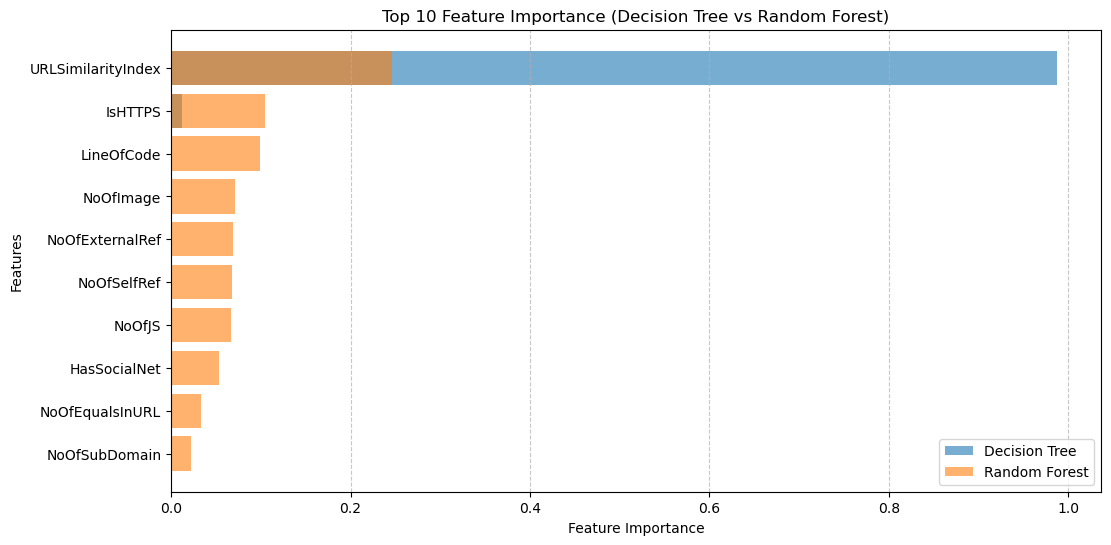

In [253]:
# 9.4 Select top 10 features based on Random Forest importance
top_features = importance_df.sort_values(by="Random Forest Importance", ascending=False).head(10)

# Visualize feature importance for Decision Tree and Random Forest
plt.figure(figsize=(12, 6))
plt.barh(top_features["Feature"], top_features["Decision Tree Importance"], alpha=0.6, label="Decision Tree")
plt.barh(top_features["Feature"], top_features["Random Forest Importance"], alpha=0.6, label="Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance (Decision Tree vs Random Forest)")
plt.legend()
plt.gca().invert_yaxis()  # Reverse order to display highest importance at the top
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


Based on the analysis, the top 10 features contributing to prediction of phishing URLs are:
- URLSimilarityIndex,
- IsHTTPS,
- LineOfCode,
- NoOfImage,
- NoOfExternalRef,
- NoOfSelfRef,
- NoOfJS,
- HasSocialNet,
- NoOfEqualsInURL,
- NoOfSubDomain

To conclude, Decision tree performed better acheiving near perfect and consistent evaluation accross all datasets. Because of its simplicity and interpretability, it is computationally simpler and faster to train. Random Forest captured the hidden patterns well but because of its complexity, it is considerably slower and may not e the best choice in situations where we need real time results.